In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from scipy.cluster import hierarchy
from scipy import cluster

In [2]:
#读取文件
df = pd.read_table('stat_res_oh_vs_oo1.csv',sep=',')
df.head()

,groups,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Acidovorax sp. MR-S7,70.841077,-4.599188,1.832841,-2.509322,NaN,NaN
1,Acinetobacter sp. 1578804,206.088428,-0.116800,1.761132,-0.066321,NaN,NaN
2,Actinomyces dentalis DSM 19115,81.393050,-5.385373,1.775725,-3.032775,0.002423,0.016301
3,Actinomyces sp. ICM47,71.193871,0.227164,1.566317,0.145030,0.884687,0.962747
4,Actinomyces sp. oral taxon 180 str. F0310,4130.217744,-6.946758,2.082976,-3.335016,NaN,NaN


In [3]:
cut_off_pvalue = 0.0000001
cut_off_log2FC = 1

In [4]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars
import matplotlib as mpl
import math
%matplotlib inline

In [5]:
df.loc[(df.log2FoldChange>1)&(df.padj<0.05),'type']='up'
df.loc[(df.log2FoldChange<-1)&(df.padj<0.05),'type']='down'
df.loc[(abs(df.log2FoldChange)<=1)|(df.padj>=0.05),'type']='nosig'

In [6]:
df.head()

,groups,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,type
0,Acidovorax sp. MR-S7,70.841077,-4.599188,1.832841,-2.509322,NaN,NaN,NaN
1,Acinetobacter sp. 1578804,206.088428,-0.116800,1.761132,-0.066321,NaN,NaN,nosig
2,Actinomyces dentalis DSM 19115,81.393050,-5.385373,1.775725,-3.032775,0.002423,0.016301,down
3,Actinomyces sp. ICM47,71.193871,0.227164,1.566317,0.145030,0.884687,0.962747,nosig
4,Actinomyces sp. oral taxon 180 str. F0310,4130.217744,-6.946758,2.082976,-3.335016,NaN,NaN,NaN


In [7]:
df.type.value_counts()

nosig    64
down      9
up        9
Name: type, dtype: int64

In [8]:
df['p']=-df.padj.apply(math.log10)

In [9]:
df[['log2FoldChange','pvalue','type','padj','p']].head()

,log2FoldChange,pvalue,type,padj,p
0,-4.599188,NaN,NaN,NaN,NaN
1,-0.116800,NaN,nosig,NaN,NaN
2,-5.385373,0.002423,down,0.016301,1.787778
3,0.227164,0.884687,nosig,0.962747,0.016488
4,-6.946758,NaN,NaN,NaN,NaN


In [10]:
df1=df[['log2FoldChange','groups','p']]
df1

,log2FoldChange,groups,p
0,-4.599188,Acidovorax sp. MR-S7,NaN
1,-0.116800,Acinetobacter sp. 1578804,NaN
2,-5.385373,Actinomyces dentalis DSM 19115,1.787778
3,0.227164,Actinomyces sp. ICM47,0.016488
4,-6.946758,Actinomyces sp. oral taxon 180 str. F0310,NaN
...,...,...,...
104,0.975800,Streptomyces griseorubens,0.157532
105,4.743298,Tyzzerella nexilis DSM 1787,NaN
106,4.743298,Veillonella sp. 3_1_44,NaN
107,-7.625862,Veillonella sp. 6_1_27,NaN


In [11]:
#df1以p列进行降序排序
df1=df1.sort_values(by='p',ascending=False)
df1

,log2FoldChange,groups,p
6,-18.264743,Alloscardovia omnicolens F0580,11.402285
35,-8.925053,Enterobacter cloacae,4.674198
70,7.572749,Prevotella aurantiaca JCM 15754,4.047587
76,7.500993,Prevotella intermedia 17,4.047587
41,-7.837129,Gemella morbillorum M424,3.831080
...,...,...,...
102,-13.399079,Streptococcus dysgalactiae subsp. equisimilis ...,NaN
103,-11.411778,Streptococcus vestibularis F0396,NaN
105,4.743298,Tyzzerella nexilis DSM 1787,NaN
106,4.743298,Veillonella sp. 3_1_44,NaN


In [17]:
#提取df1的前10行
df2=df1.head(9)
df2

,log2FoldChange,groups,p
6,-18.264743,Alloscardovia omnicolens F0580,11.402285
35,-8.925053,Enterobacter cloacae,4.674198
70,7.572749,Prevotella aurantiaca JCM 15754,4.047587
76,7.500993,Prevotella intermedia 17,4.047587
41,-7.837129,Gemella morbillorum M424,3.831080
45,-7.727925,Klebsiella pneumoniae,3.734439
18,-5.541868,Capnocytophaga cynodegmi,2.634019
31,5.586954,Desulfobulbus sp. Tol-SR,2.132084
22,-5.251943,Capnocytophaga sputigena ATCC 33612,1.925892


In [21]:
#df2删除含有Capnocytophaga sp. HMT 412的行
df2=df2[df2.groups!='Prevotella intermedia 17']
df2=df2[df2.groups!='Klebsiella pneumoniae']
df2

,log2FoldChange,groups,p
6,-18.264743,Alloscardovia omnicolens F0580,11.402285
35,-8.925053,Enterobacter cloacae,4.674198
70,7.572749,Prevotella aurantiaca JCM 15754,4.047587
41,-7.837129,Gemella morbillorum M424,3.831080
18,-5.541868,Capnocytophaga cynodegmi,2.634019
31,5.586954,Desulfobulbus sp. Tol-SR,2.132084
22,-5.251943,Capnocytophaga sputigena ATCC 33612,1.925892


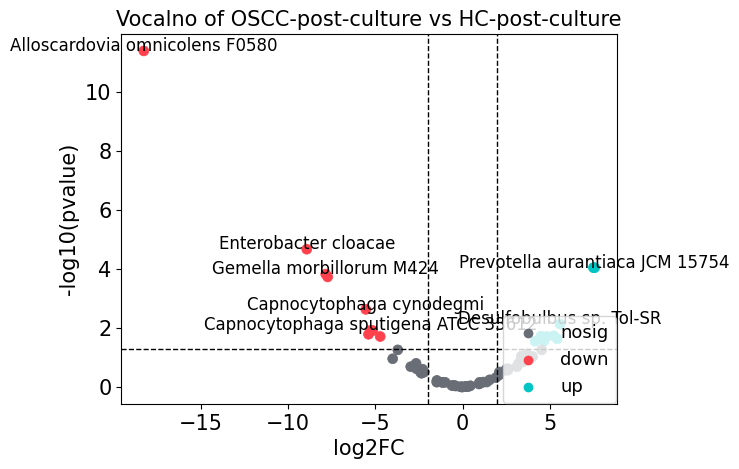

In [26]:
colors = ["#686d76","#ff414d", "#01c5c4"]
sns.set_palette(sns.color_palette(colors))
ax=sns.scatterplot(x='log2FoldChange', y='p',data=df,
                hue='type',#颜色映射
                edgecolor = None,#点边界颜色
                s=50,#点大小
                )
ax.set_title("Vocalno of OSCC-post-culture vs HC-post-culture",fontsize=15)


for i, row in df2.iterrows():
    ax.text(row['log2FoldChange'], row['p'], row['groups'], horizontalalignment='center', size=12, color='black')

#Y轴在1.3的位置添加一条横的虚线
ax.axhline(y=1.3,ls="--",c="black",linewidth=1)
#X轴在-2和2的位置添加一条竖的虚线
ax.axvline(x=-2,ls="--",c="black",linewidth=1)
ax.axvline(x=2,ls="--",c="black",linewidth=1)
#纵坐标字体大小变大
ax.yaxis.set_tick_params(labelsize=15)
#横坐标字体大小变大
ax.xaxis.set_tick_params(labelsize=15)
ax.set_xlabel("log2FC",fontsize=15)
ax.set_ylabel("-log10(pvalue)",fontsize=15)
ax.legend(loc='center right', bbox_to_anchor=(1.016,0.12), ncol=1, fontsize=13)
fig = ax.get_figure()
plt.savefig('Vocalno HC-post-culture vs OSCC-post-cultur1.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [11]:
#在图中显示down和up点在Genomic bins列的值
for i in range(df.shape[0]):
    if df.loc[i,'type']=='up' or df.loc[i,'type']=='down':
        ax.text(df.loc[i,'log2FoldChange'],df.loc[i,'p'],df.loc[i,'Genomic bins'],fontsize=8)

KeyError: 'Genomic bins'